## Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, hamming_loss, jaccard_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

## Load Dataset

In [2]:
df = pd.read_csv('Food_and_Nutrition__.csv')
df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.0,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.0,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


## Basic Dataset Information

##### Jumlah Baris dan Kolom Data

In [3]:
df.shape
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 1698
Jumlah kolom: 19


##### Informasi Tipe Data dan Jumlah Non-Null per Kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

##### Statistik Deskriptif Dataset

In [5]:
df.describe()

,Ages,Height,Weight,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,43.961720,174.130153,78.064193,2275.171967,139.898115,126.192580,27.979623,2196.440518,252.385159,30.286219,69.700824
std,15.915002,13.420936,16.949264,558.812405,53.326588,34.938902,10.665318,571.089569,69.877804,8.385337,21.430707
min,18.000000,150.000000,48.000000,1200.000000,50.000000,60.000000,10.000000,990.000000,120.000000,14.400000,30.000000
25%,30.000000,163.250000,64.000000,1800.000000,100.000000,100.000000,20.000000,1770.250000,200.000000,24.000000,52.000000
50%,42.000000,174.000000,78.000000,2200.000000,136.000000,124.000000,27.200000,2146.000000,248.000000,29.760000,69.000000
75%,57.000000,185.000000,91.000000,2689.000000,174.000000,150.000000,34.800000,2549.750000,300.000000,36.000000,85.000000
max,79.000000,200.000000,119.000000,4364.000000,327.000000,218.000000,65.400000,4357.000000,436.000000,52.320000,145.000000


## Exploratory Data Analysis

##### Cek Missing Value

In [6]:
df.isnull().sum()

Ages                    0
Gender                  0
Height                  0
Weight                  0
Activity Level          0
Dietary Preference      0
Daily Calorie Target    0
Protein                 0
Sugar                   0
Sodium                  0
Calories                0
Carbohydrates           0
Fiber                   0
Fat                     0
Breakfast Suggestion    0
Lunch Suggestion        0
Dinner Suggestion       0
Snack Suggestion        0
Disease                 0
dtype: int64

##### Cek Duplikat Tiap Kolom

In [7]:
df.duplicated().sum()

np.int64(0)

##### Cek Nilai Unik Tiap Kolom

In [8]:
columns = df.columns
for i, col in enumerate (columns):
    print (f"Columns {i} = ", df[col].nunique())

Columns 0 =  62
Columns 1 =  2
Columns 2 =  51
Columns 3 =  71
Columns 4 =  5
Columns 5 =  4
Columns 6 =  895
Columns 7 =  231
Columns 8 =  276
Columns 9 =  231
Columns 10 =  759
Columns 11 =  276
Columns 12 =  276
Columns 13 =  103
Columns 14 =  121
Columns 15 =  190
Columns 16 =  177
Columns 17 =  112
Columns 18 =  13


##### Cek Imbalance Data/Tidak

In [9]:
print(df['Disease'].value_counts())

print(df['Disease'].value_counts(normalize=True) * 100)


Disease
Weight Gain                                                                 1312
Weight Gain, Hypertension, Heart Disease                                     129
Weight Gain, Kidney Disease                                                   91
Weight Gain, Hypertension, Heart Disease, Kidney Disease                      82
Diabetes, Acne, Weight Gain, Hypertension, Heart Disease                      45
Diabetes, Acne, Hypertension, Heart Disease                                   14
Hypertension, Heart Disease                                                    9
Diabetes, Acne, Weight Gain, Hypertension, Heart Disease, Kidney Disease       5
Hypertension, Heart Disease, Kidney Disease                                    4
Kidney Disease                                                                 3
Hypertension, Kidney Disease                                                   2
Diabetes, Acne, Weight Loss, Hypertension, Heart Disease, Kidney Disease       1
Diabetes, Acne, Hype

##### Cek Gerbage Value (Typo/Aneh)

In [10]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("---"*8)

Gender
Female    862
Male      836
Name: count, dtype: int64
------------------------
Activity Level
Moderately Active    420
Sedentary            403
Lightly Active       396
Very Active          341
Extremely Active     138
Name: count, dtype: int64
------------------------
Dietary Preference
Omnivore       564
Vegan          546
Vegetarian     448
Pescatarian    140
Name: count, dtype: int64
------------------------
Breakfast Suggestion
Smoothie with protein powder                         210
Oatmeal with berries and nuts                        185
Scrambled eggs with whole wheat toast                144
Tofu scramble with veggies                           142
Greek yogurt with granola and fruit                  129
                                                    ... 
Eggs with Whole Wheat Toast and Avocado                1
Scrambled eggs with whole wheat toast and spinach      1
Fruit salad with yogurt                                1
Eggs with whole grain toast                

##### Visualisasi Distribusi Kolom Kategorikal 

In [11]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Activity Level', 'Dietary Preference',
       'Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion',
       'Snack Suggestion', 'Disease'],
      dtype='object')

C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\2281016319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=color_palette)
C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\2281016319.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, palette=color_palette)
C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\2281016319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=color_palette)
C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\2281016319.py:8: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce 

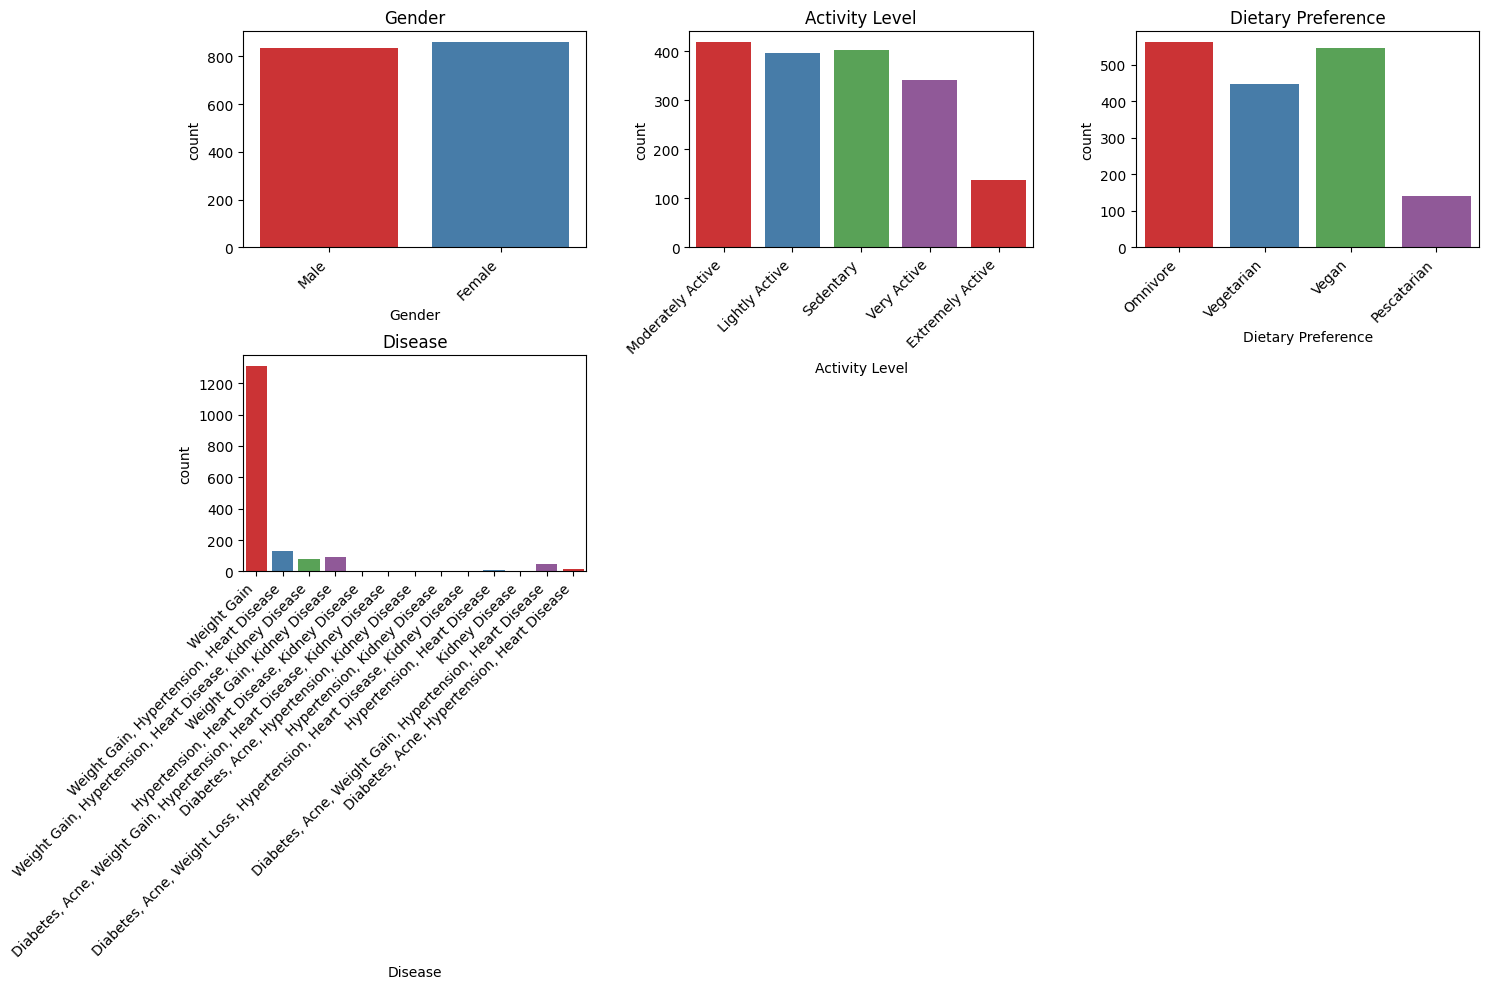

In [12]:
col_bar = ['Gender', 'Activity Level', 'Dietary Preference', 'Disease' ]

color_palette = sns.color_palette("Set1", len(col_bar))

plt.figure(figsize=(15, 10))
for i, column in enumerate(col_bar, 1):
    plt.subplot((len(col_bar)//3)+1, 3, i)
    sns.countplot(data=df, x=column, palette=color_palette)
    plt.title(column)
    plt.xticks(rotation=45, ha='right', fontsize=10)  

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)  
plt.show()


C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\4172453561.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=column, palette=color_palette)
C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\4172453561.py:8: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=filtered_df, x=column, palette=color_palette)


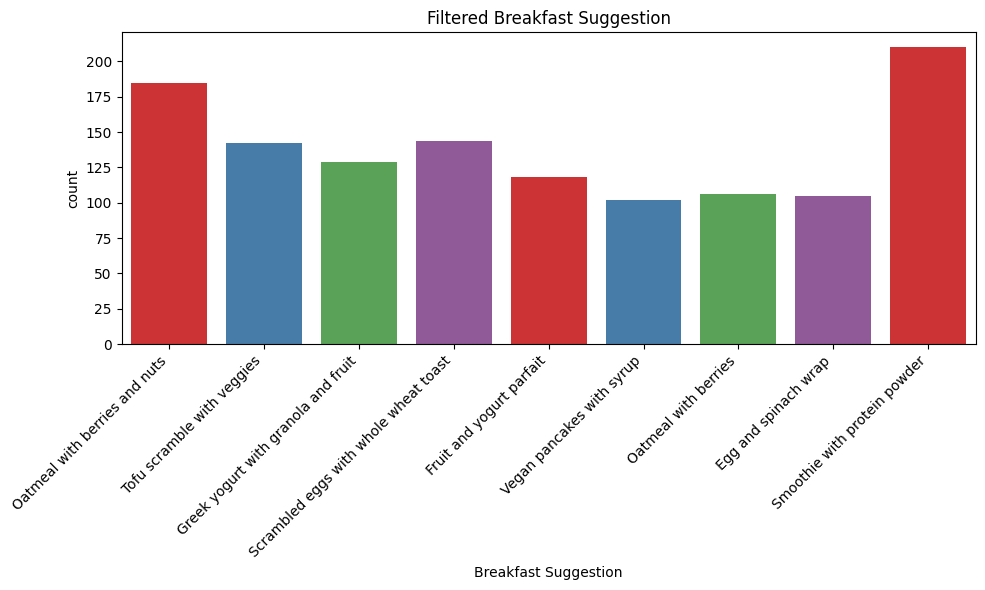

C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\4172453561.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=column, palette=color_palette)
C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\4172453561.py:8: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=filtered_df, x=column, palette=color_palette)


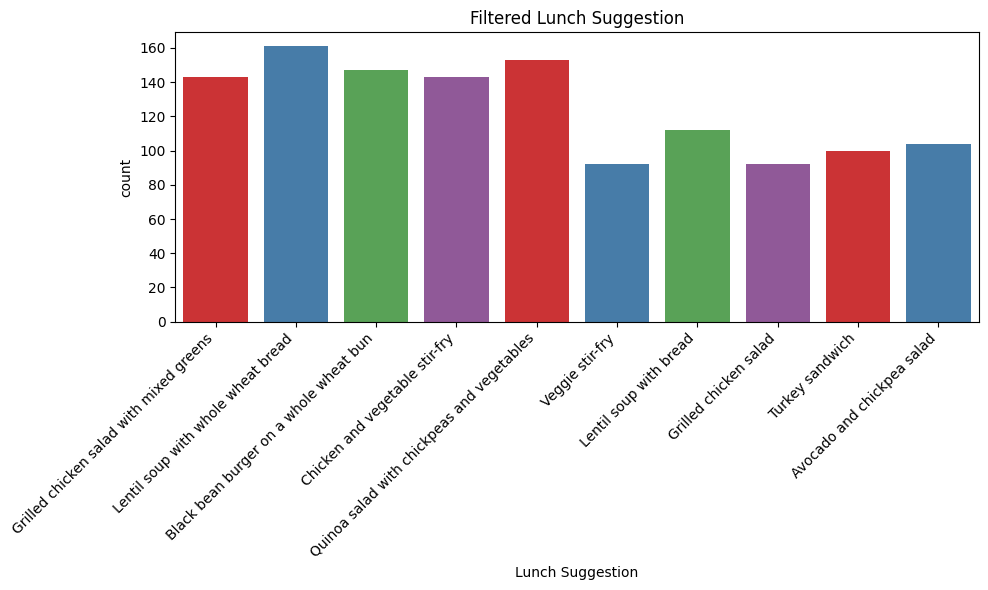

C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\4172453561.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=column, palette=color_palette)
C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\4172453561.py:8: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=filtered_df, x=column, palette=color_palette)


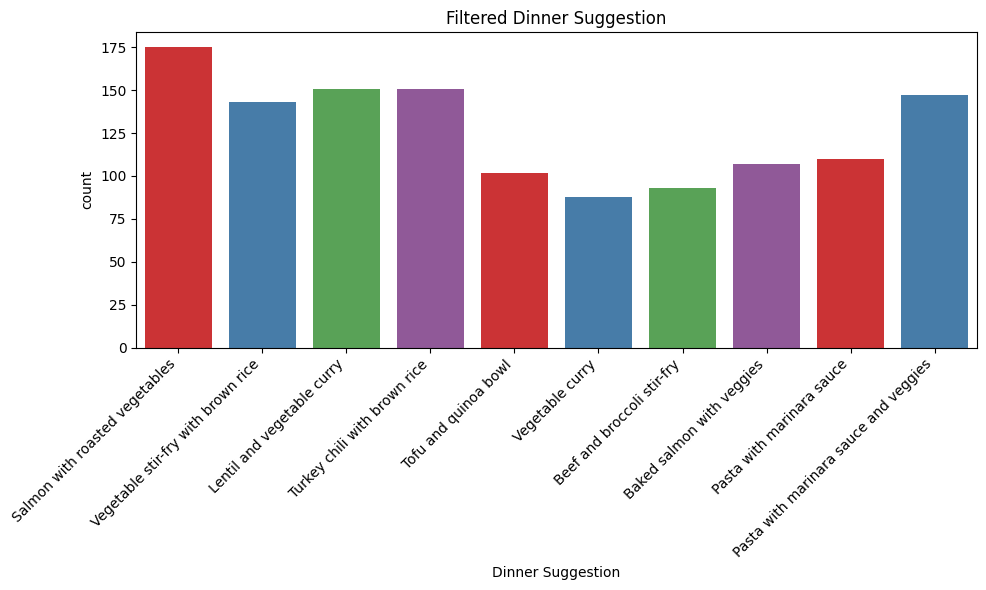

In [13]:
# Filter hanya nilai yang muncul lebih dari 50 kali
for column in ['Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion']:
    value_counts = df[column].value_counts()
    top_values = value_counts[value_counts > 50].index 
    filtered_df = df[df[column].isin(top_values)]
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=filtered_df, x=column, palette=color_palette)
    plt.title(f"Filtered {column}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


##### Visualisasi Distribusi Kolom Numerik 

In [14]:
df.select_dtypes(include= 'number').columns

Index(['Ages', 'Height', 'Weight', 'Daily Calorie Target', 'Protein', 'Sugar',
       'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat'],
      dtype='object')

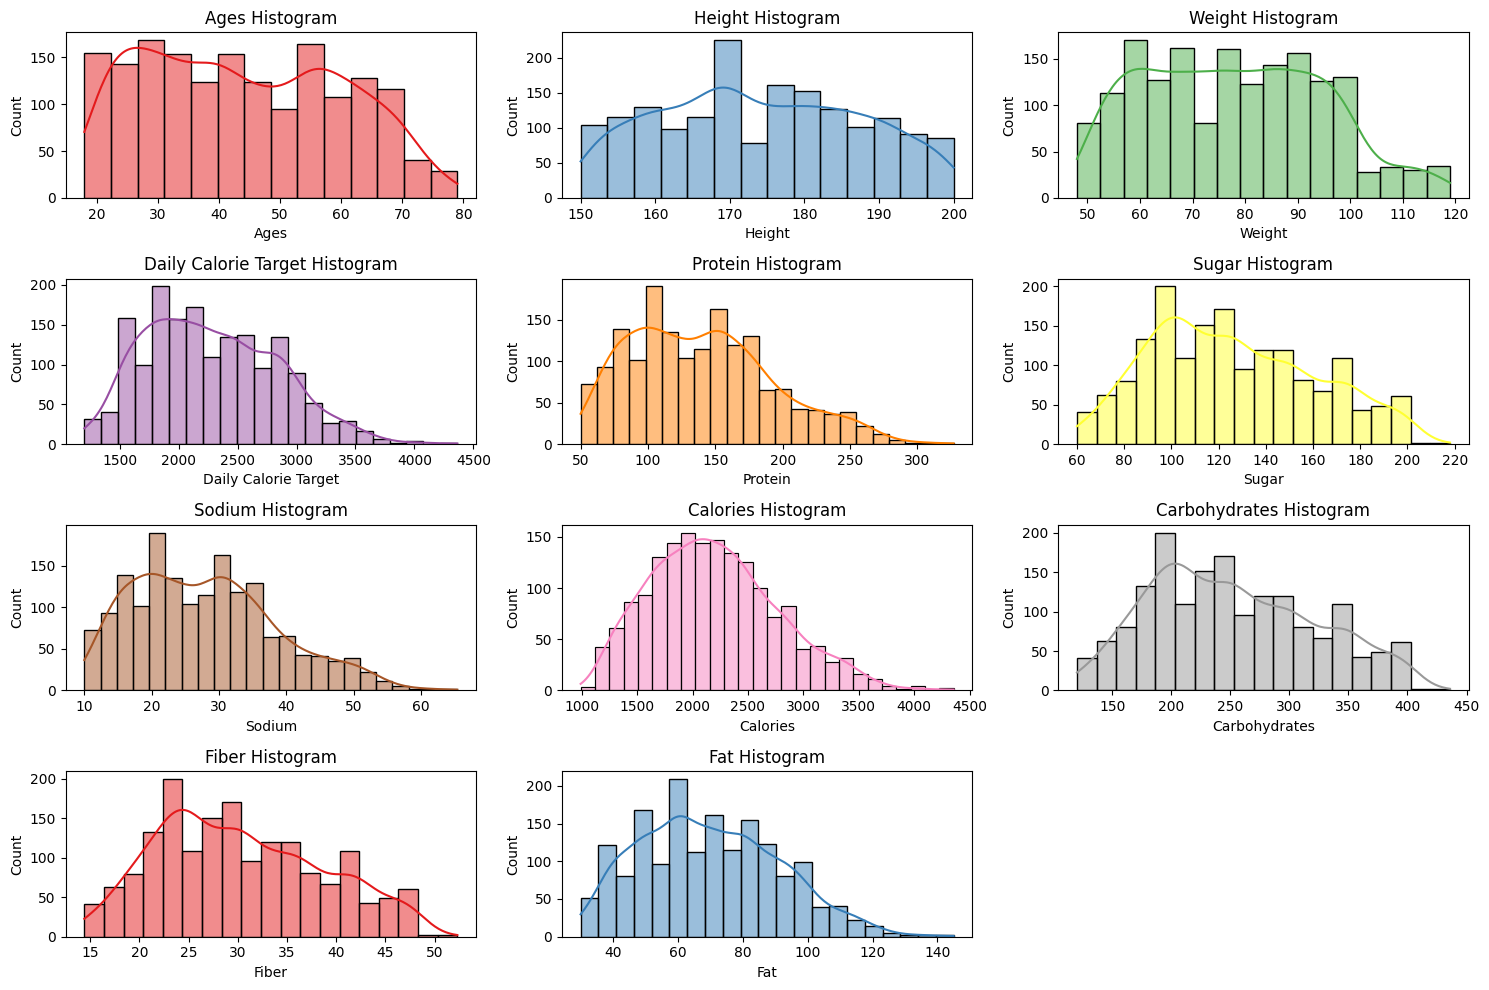

In [15]:
col_box = ['Ages', 'Height', 'Weight', 'Daily Calorie Target', 'Protein', 'Sugar',
       'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat']
color_palette = sns.color_palette("Set1", len(col_box))
plt.figure(figsize=(15, 10))

for i, column in enumerate(col_box, 1):
    plt.subplot((len(col_box) // 3) + 1, 3, i)
    sns.histplot(data=df, x=column, color=color_palette[i - 1], kde=True)
    plt.xlabel(column)
    plt.title(f'{column} Histogram')

plt.tight_layout()
plt.show()

##### Deteksi Outlier Kolom Numerik (Boxplot)

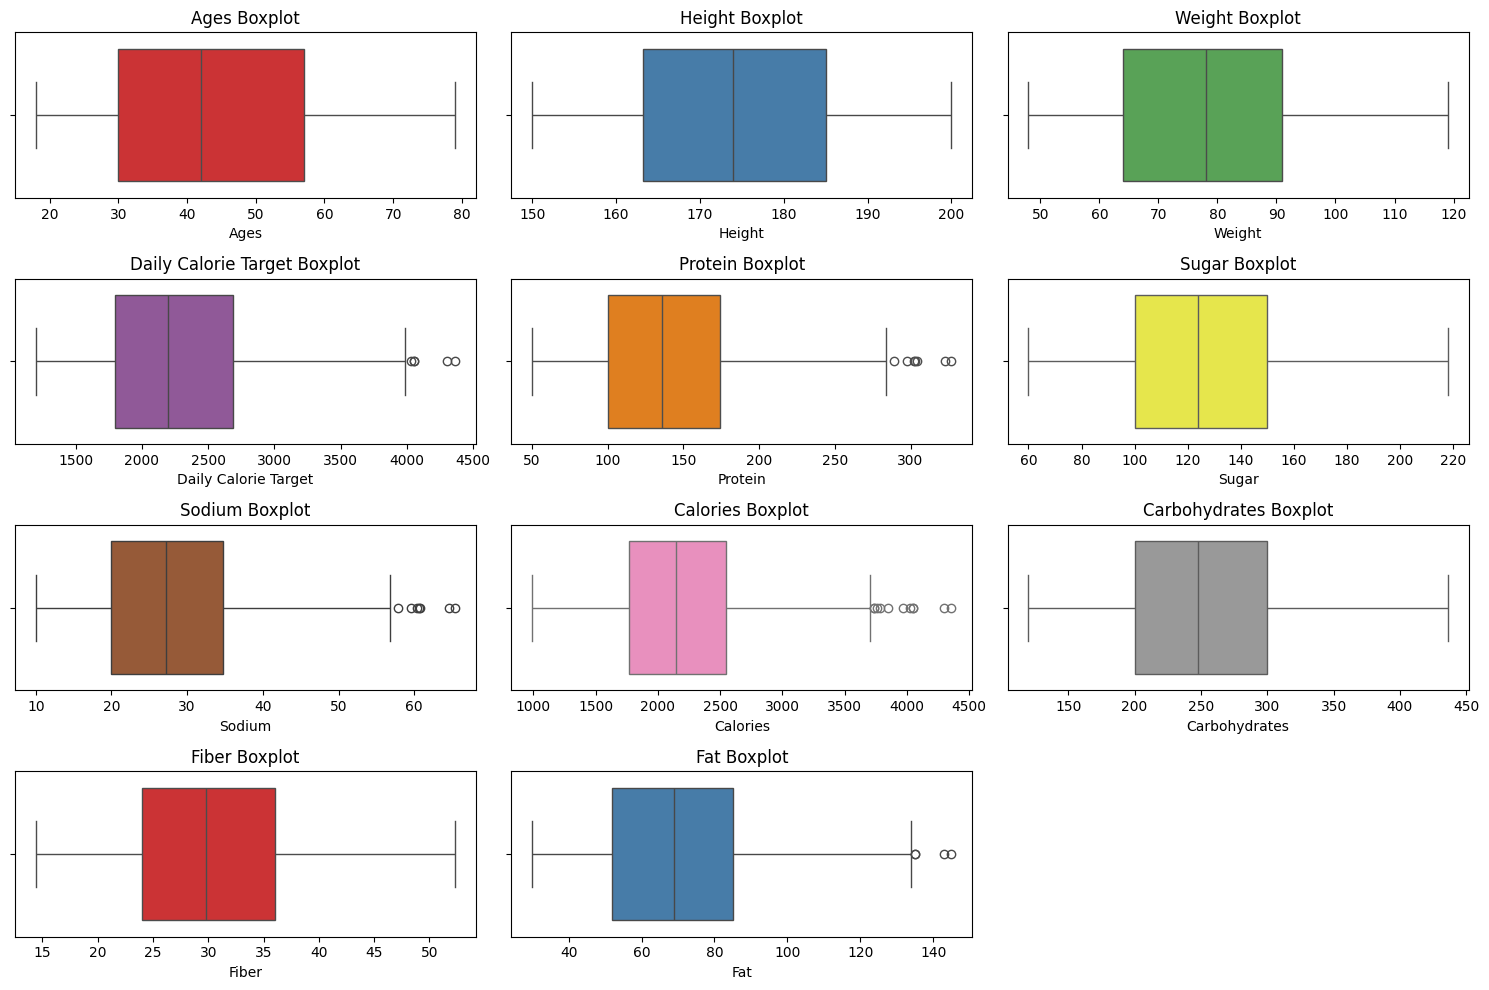

In [16]:
col_box = ['Ages', 'Height', 'Weight', 'Daily Calorie Target', 'Protein', 'Sugar',
       'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat']
color_palette = sns.color_palette("Set1", len(col_box))
plt.figure(figsize = (15, 10))

for i, column in enumerate(col_box, 1):
    plt.subplot((len(col_box)//3)+1, 3, i)
    sns.boxplot(data=df, x=column, color=color_palette[i - 1])
    plt.xlabel(column)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

##### Heatmap Korelasi Fitur Numerik

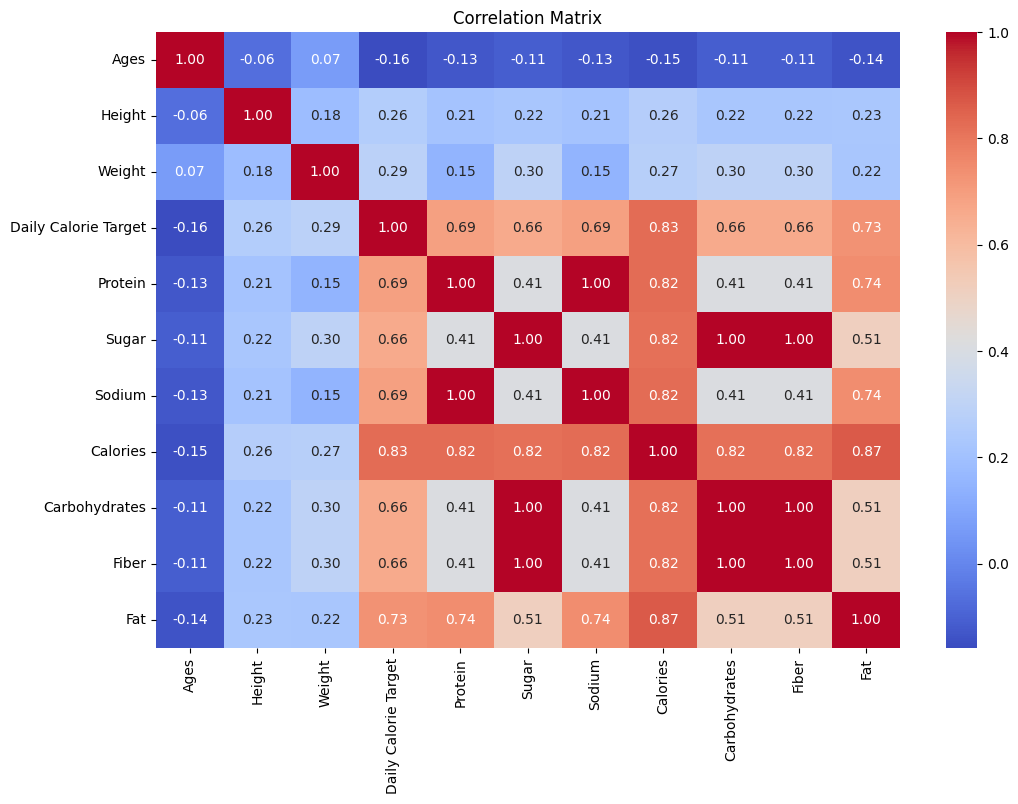

In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


##### Analisis Bivariate: Distribusi Kalori Berdasarkan Preferensi Diet

C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\2853349015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dietary Preference', y='Calories', data=df, palette="Set2")


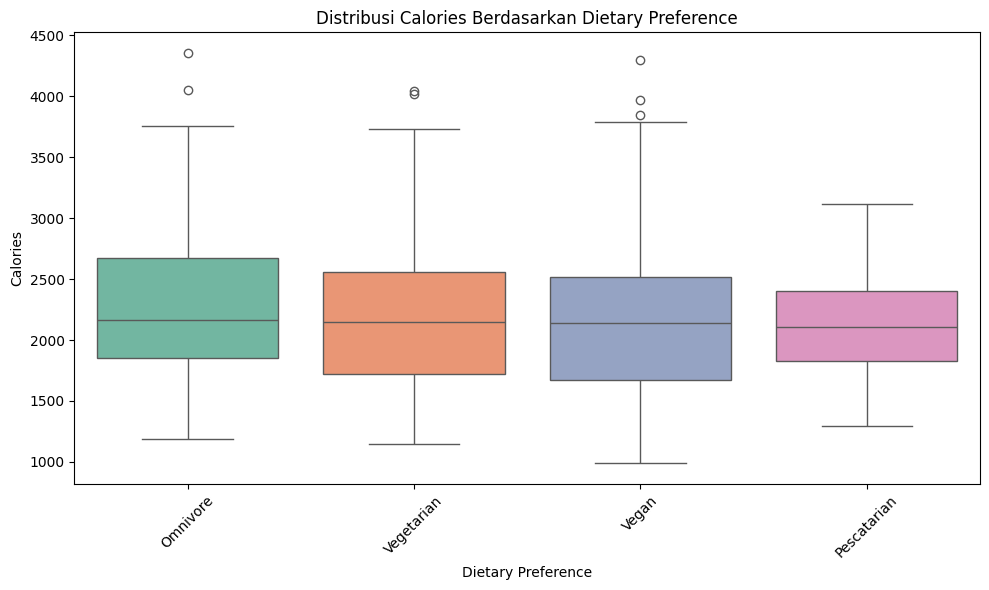

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dietary Preference', y='Calories', data=df, palette="Set2")
plt.title("Distribusi Calories Berdasarkan Dietary Preference")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Analisis Bivariate: Distribusi Breakfast Suggestion Berdasarkan Gender

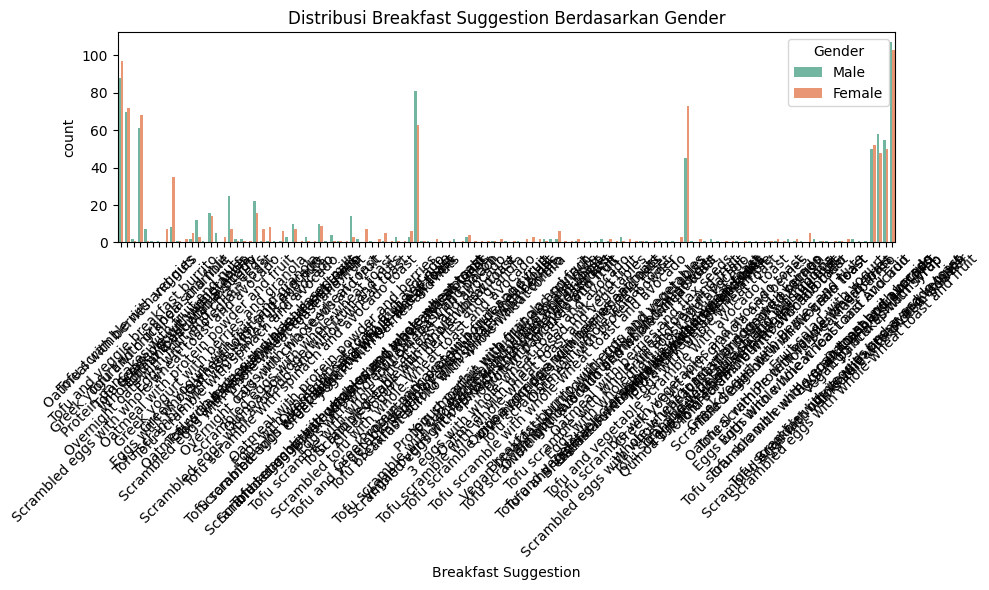

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Breakfast Suggestion', hue='Gender', data=df, palette='Set2')
plt.title("Distribusi Breakfast Suggestion Berdasarkan Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Analisis Bivariate: Hubungan Antara Tinggi dan Berat Badan Berdasarkan Gender

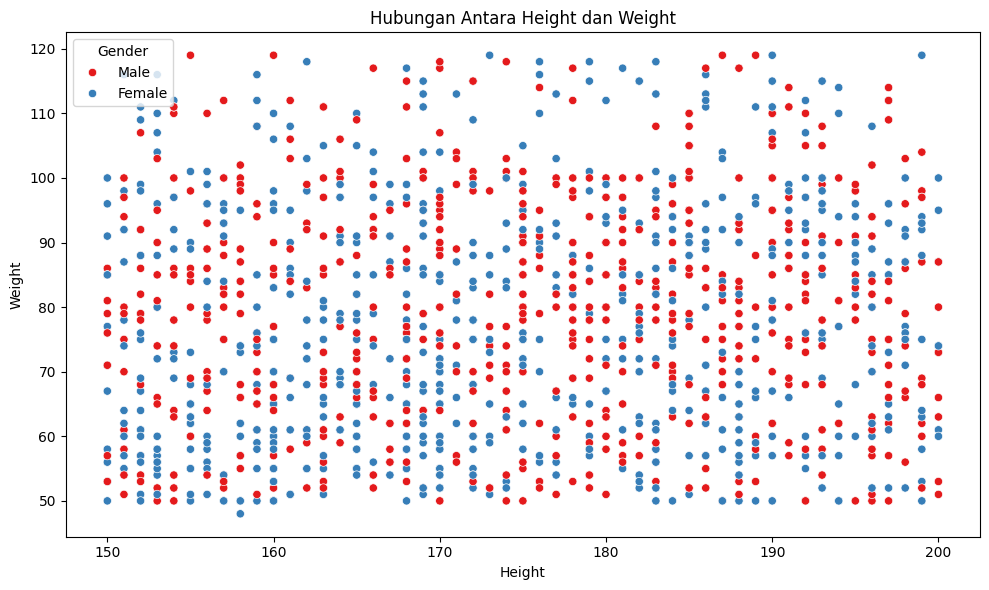

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=df, hue='Gender', palette='Set1')
plt.title("Hubungan Antara Height dan Weight")
plt.tight_layout()
plt.show()


##### Analisis Bivariate: Distribusi Kalori Berdasarkan Preferensi Diet

C:\Users\ROSI\AppData\Local\Temp\ipykernel_35040\3380559043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dietary Preference', y='Calories', data=df, palette='Set2')


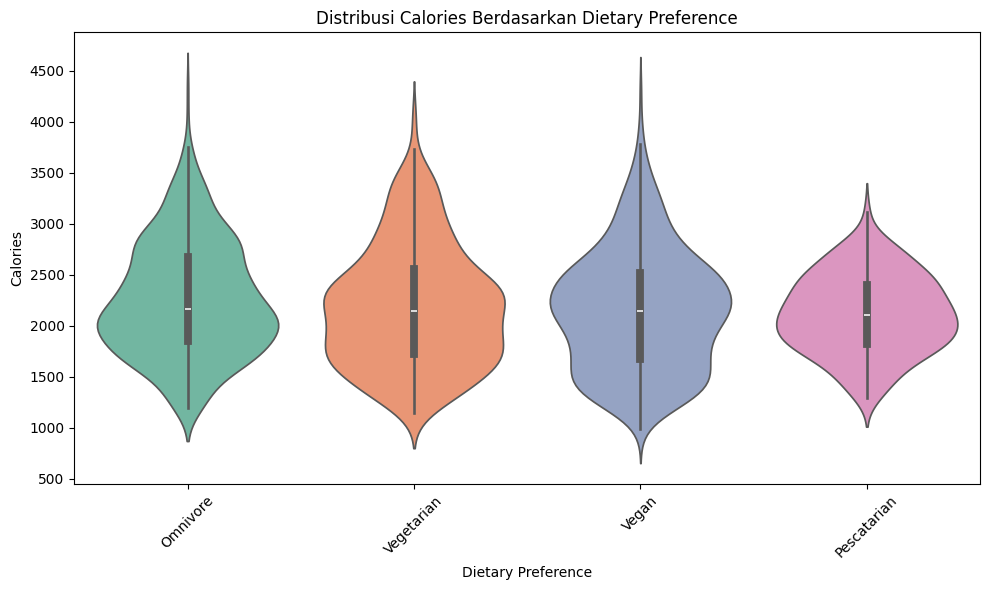

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Dietary Preference', y='Calories', data=df, palette='Set2')
plt.title("Distribusi Calories Berdasarkan Dietary Preference")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Analisis Bivariate: Hubungan Antara Beberapa Variabel Numerik

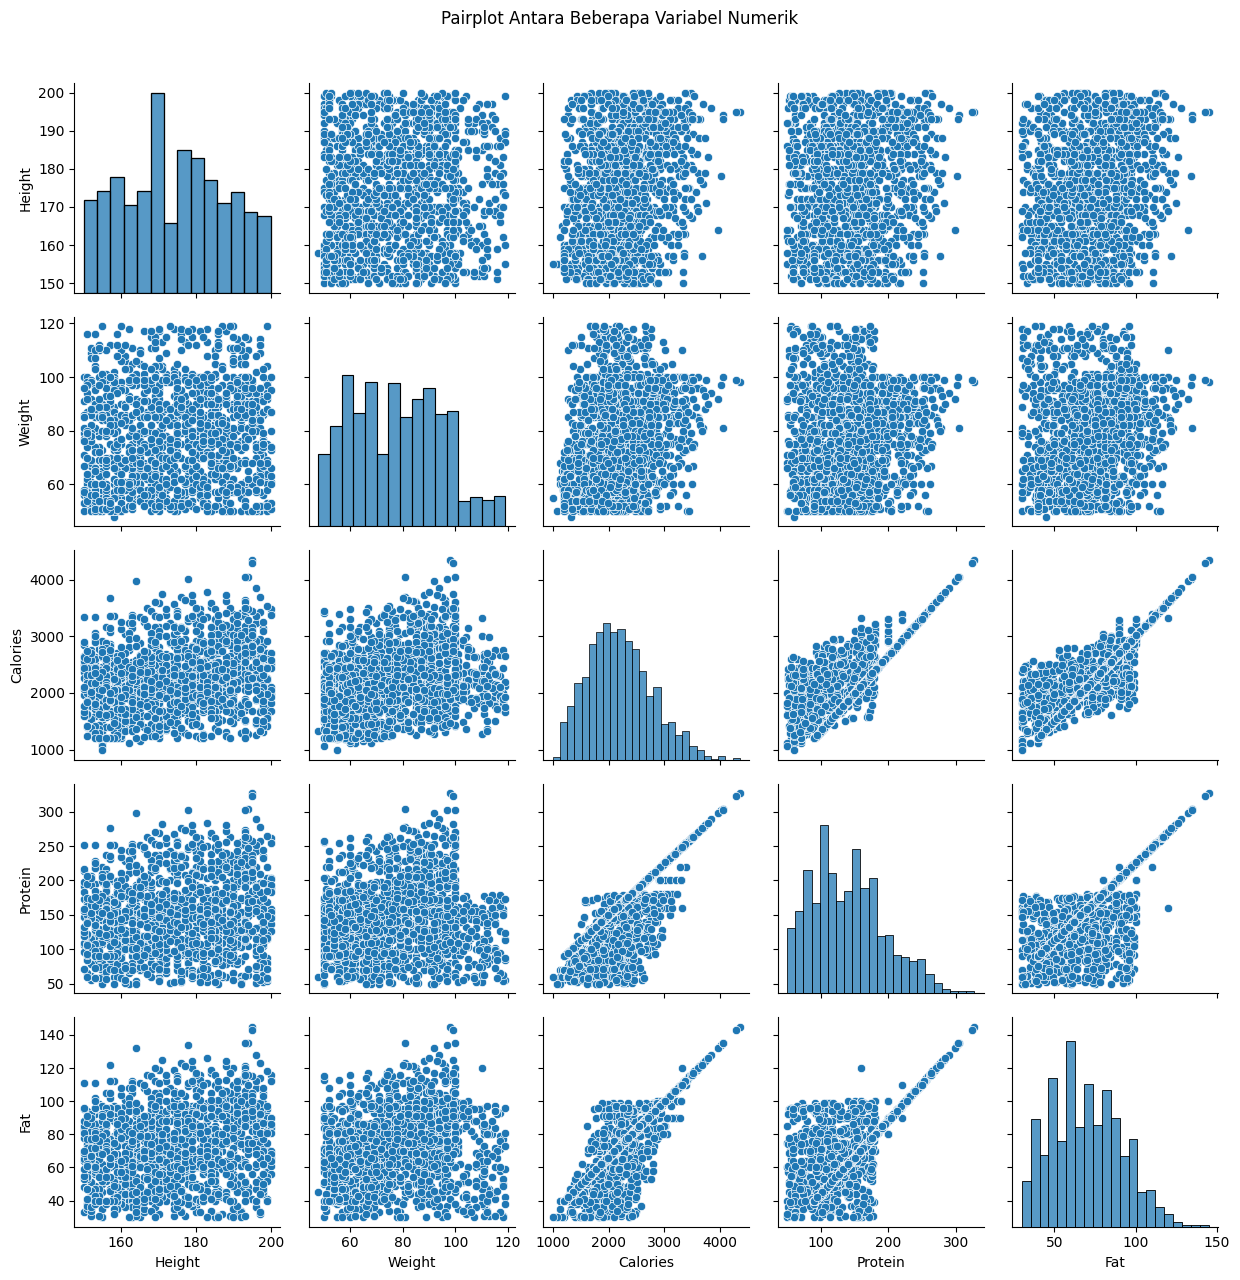

In [22]:
sns.pairplot(df[['Height', 'Weight', 'Calories', 'Protein', 'Fat']])
plt.suptitle("Pairplot Antara Beberapa Variabel Numerik", y=1.02)
plt.tight_layout()
plt.show()


## Preprocessing

##### Kolom 'Disease' Menjadi List Label dan Encoding dengan MultiLabelBinarizer

In [23]:
# Mengubah kolom 'Disease' menjadi list label
df["Disease_list"] = df["Disease"].str.split(",").apply(lambda x: [d.strip() for d in x])

# Menggunakan MultiLabelBinarizer untuk encoding
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df["Disease_list"])
label_names = mlb.classes_

# Menampilkan beberapa label untuk memastikan
print("Label Names:", label_names)


Label Names: ['Acne' 'Diabetes' 'Heart Disease' 'Hypertension' 'Kidney Disease'
 'Weight Gain' 'Weight Loss']


##### Menghitung Indeks Massa Tubuh (BMI)

In [24]:
# Menghitung BMI
df["BMI"] = df["Weight"] / (df["Height"] / 100)**2
df['BMI'].head()


0    24.691358
1    23.875115
2    31.020408
3    27.343750
4    29.411765
Name: BMI, dtype: float64

##### Feature Selection

Skenario 1: Fitur Nutrisi Saja (feature_1)

Pada skenario pertama, fitur yang digunakan untuk analisis hanya mencakup data terkait nutrisi, yaitu: Protein, Sugar, Sodium, Calories, Carbohydrates, Fiber, Fat, dan Daily Calorie Target. Data nutrisi ini akan digunakan untuk membangun model prediksi.

Skenario 2: Fitur Nutrisi + Demografi (feature_2)

Pada skenario kedua, fitur yang digunakan mencakup kombinasi antara data nutrisi dan data demografi, yaitu: Protein, Sugar, Sodium, Calories, Carbohydrates, Fiber, Fat, Daily Calorie Target, serta data demografi seperti Ages, Height, Weight, BMI, Gender, Activity Level, dan Dietary Preference. Data ini memberikan gambaran yang lebih lengkap untuk model prediksi.

In [25]:
feature_1 = [
    "Protein", "Sugar", "Sodium", "Calories",
    "Carbohydrates", "Fiber", "Fat", "Daily Calorie Target"
]

X_1 = df[feature_1]

feature_2 = feature_1 + [
    "Ages", "Height", "Weight", "BMI",
    "Gender", "Activity Level", "Dietary Preference"
]

X_2 = df[feature_2]


##### Menyiapkan transformers untuk scaling dan encoding

In [26]:
# Menentukan kolom numerik dan kategorikal
numeric_cols_1 = feature_1  # Fitur numerik untuk scenario 1
numeric_cols_2 = feature_1 + ["Ages", "Height", "Weight", "BMI"]  # Fitur numerik untuk scenario 2
categorical_cols_2 = ["Gender", "Activity Level", "Dietary Preference"]  # Fitur kategorikal untuk scenario 2

preprocess_1 = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols_1)  # Hanya fitur numerik pada feature_1
])

preprocess_2 = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols_2),  # Fitur numerik pada feature_2
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols_2)  # Fitur kategorikal pada feature_2
])


##### Split Data

In [27]:
X_train_1, X_test_1, Y_train, Y_test = train_test_split(X_1, Y, test_size=0.2, random_state=42)
X_train_2, X_test_2, _, _ = train_test_split(X_2, Y, test_size=0.2, random_state=42)


# Modeling

##### Pembuatan dan Pelatihan Model Klasifikasi dengan RandomForest

- Membuat model OvR dengan RandomForestClassifier
- Membuat pipeline dan training untuk kedua skenario
  - Pipeline untuk Skenario 1 (Fitur Nutrisi Saja)
  - Pipeline untuk Skenario 2 (Fitur Nutrisi + Demografi)

In [28]:
ovr_rf = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=300, random_state=42)
)

pipe_1 = Pipeline([
    ("preprocess", preprocess_1),
    ("clf", ovr_rf)
])

pipe_1.fit(X_train_1, Y_train)
pred_1 = pipe_1.predict(X_test_1)

pipe_2 = Pipeline([
    ("preprocess", preprocess_2),
    ("clf", ovr_rf)
])

pipe_2.fit(X_train_2, Y_train)
pred_2 = pipe_2.predict(X_test_2)


##### Evaluasi Model Klasifikasi untuk Dua Skenario

- Evaluasi Skenario 1: Fitur Nutrisi Saja
  - Menggunakan Hamming Loss, Jaccard Score (micro dan macro), dan Classification Report untuk evaluasi model pada skenario fitur nutrisi saja.

- Evaluasi Skenario 2: Fitur Nutrisi + Demografi
  - Evaluasi model dengan metrik yang sama pada skenario fitur yang lebih kompleks (nutrisi + demografi).

- Ringkasan Metrik Utama
  - Menyimpan hasil Hamming Loss, Jaccard Score untuk setiap skenario.
  - Memilih Feature Set Terbaik berdasarkan skor Jaccard Micro.


In [29]:
def evaluate_multilabel(y_true, y_pred, label_names, title=""):
    print("=" * 60)
    print(title)
    print("=" * 60)
    print("Hamming Loss      :", hamming_loss(y_true, y_pred))
    print("Jaccard (micro)   :", jaccard_score(y_true, y_pred, average="micro"))
    print("Jaccard (macro)   :", jaccard_score(y_true, y_pred, average="macro"))
    print("\nClassification Report per label:")
    print(classification_report(y_true, y_pred, target_names=label_names))


# Evaluasi Skenario 1: Nutrisi saja
evaluate_multilabel(Y_test, pred_1, label_names,
                    title="SKENARIO 1 - Fitur Nutrisi Saja (feature_1)")

# Evaluasi Skenario 2: Nutrisi + Demografi
evaluate_multilabel(Y_test, pred_2, label_names,
                    title="SKENARIO 2 - Fitur Nutrisi + Demografi (feature_2)")


# Simpan metrik utama untuk pemilihan feature set terbaik
metrics_1 = {
    "hamming": hamming_loss(Y_test, pred_1),
    "jaccard_micro": jaccard_score(Y_test, pred_1, average="micro"),
    "jaccard_macro": jaccard_score(Y_test, pred_1, average="macro"),
}

metrics_2 = {
    "hamming": hamming_loss(Y_test, pred_2),
    "jaccard_micro": jaccard_score(Y_test, pred_2, average="micro"),
    "jaccard_macro": jaccard_score(Y_test, pred_2, average="macro"),
}

print("\nRingkasan metrik utama:")
print("Skenario 1 (Nutrisi saja):", metrics_1)
print("Skenario 2 (Nutrisi + Demografi):", metrics_2)

# Tentukan feature set terbaik berdasarkan Jaccard micro (bisa kamu ganti logika kalau mau)
if metrics_2["jaccard_micro"] > metrics_1["jaccard_micro"]:
    best_feature_set = "feature_2"
    X_train_best, X_test_best = X_train_2, X_test_2
    preprocess_best = preprocess_2
    print("\n>> Feature set terbaik: SKENARIO 2 (Nutrisi + Demografi)")
else:
    best_feature_set = "feature_1"
    X_train_best, X_test_best = X_train_1, X_test_1
    preprocess_best = preprocess_1
    print("\n>> Feature set terbaik: SKENARIO 1 (Nutrisi saja)")


SKENARIO 1 - Fitur Nutrisi Saja (feature_1)
Hamming Loss      : 0.0004201680672268908
Jaccard (micro)   : 0.9980769230769231
Jaccard (macro)   : 0.8548009367681499

Classification Report per label:
                precision    recall  f1-score   support

          Acne       1.00      1.00      1.00        15
      Diabetes       1.00      1.00      1.00        15
 Heart Disease       0.98      1.00      0.99        60
  Hypertension       1.00      1.00      1.00        61
Kidney Disease       1.00      1.00      1.00        33
   Weight Gain       1.00      1.00      1.00       335
   Weight Loss       0.00      0.00      0.00         0

     micro avg       1.00      1.00      1.00       519
     macro avg       0.85      0.86      0.86       519
  weighted avg       1.00      1.00      1.00       519
   samples avg       1.00      1.00      1.00       519

SKENARIO 2 - Fitur Nutrisi + Demografi (feature_2)
Hamming Loss      : 0.0004201680672268908
Jaccard (micro)   : 0.998076923076

c:\Users\ROSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ROSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ROSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

##### Persiapan Model Klasifikasi

In [30]:
# Kalau mau pakai XGBoost atau LightGBM, pastikan sudah install dulu:
# pip install xgboost lightgbm
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False
    print("XGBoost tidak terinstal, model XGBoost akan dilewati.")

# (Opsional) LightGBM
try:
    from lightgbm import LGBMClassifier
    lgbm_available = True
except ImportError:
    lgbm_available = False
    print("LightGBM tidak terinstal, model LightGBM akan dilewati.")


##### Pembuatan Model dengan OneVsRestClassifier

- OvR + Logistic Regression: Menggunakan Logistic Regression dengan maksimal iterasi 500.
- OvR + Random Forest: Menggunakan Random Forest Classifier dengan 300 estimator dan random state 42.
- OvR + Linear SVC: Menggunakan Linear Support Vector Classifier (LinearSVC).
- OvR + GaussianNB: Menggunakan Gaussian Naive Bayes.
- OvR + XGBoost 

In [31]:
models = {
    "OvR + Logistic Regression": OneVsRestClassifier(
        LogisticRegression(max_iter=500)
    ),
    "OvR + Random Forest": OneVsRestClassifier(
        RandomForestClassifier(n_estimators=300, random_state=42)
    ),
    "OvR + Linear SVC": OneVsRestClassifier(
        LinearSVC()
    ),
    "OvR + GaussianNB": OneVsRestClassifier(
        GaussianNB()
    ),
}

# Tambahkan XGBoost / LightGBM kalau tersedia
if xgb_available:
    models["OvR + XGBoost"] = OneVsRestClassifier(
        XGBClassifier(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="binary:logistic",
            eval_metric="logloss",
            tree_method="hist"
        )
    )

##### Evaluasi Model Klasifikasi Multilabel

Evaluasi terhadap berbagai model yang telah dilatih menggunakan OneVsRestClassifier. Setiap model diuji dengan menggunakan Hamming Loss dan Jaccard Score (micro dan macro). Berikut adalah langkah-langkah yang dilakukan:
- Membuat Pipeline: Setiap model dilatih dalam sebuah pipeline yang terdiri dari preprocessing dan model klasifikasi.
- Pelatihan dan Evaluasi: Setiap model dilatih menggunakan X_train_best dan diuji menggunakan X_test_best, kemudian dihitung metrik Hamming Loss dan Jaccard Score.
- Menyimpan Hasil Evaluasi: Hasil evaluasi disimpan dalam sebuah list yang kemudian diubah menjadi dataframe untuk mempermudah perbandingan antar model.

In [32]:
results = []

for name, clf in models.items():
    print("\n============================================")
    print(f"Training model: {name}")
    print("============================================")

    pipe = Pipeline([
        ("preprocess", preprocess_best),
        ("clf", clf)
    ])

    pipe.fit(X_train_best, Y_train)
    y_pred = pipe.predict(X_test_best)

    hamming = hamming_loss(Y_test, y_pred)
    jacc_micro = jaccard_score(Y_test, y_pred, average="micro")
    jacc_macro = jaccard_score(Y_test, y_pred, average="macro")

    print("Hamming Loss   :", hamming)
    print("Jaccard micro  :", jacc_micro)
    print("Jaccard macro  :", jacc_macro)

    results.append({
        "Model": name,
        "Hamming Loss": hamming,
        "Jaccard Micro": jacc_micro,
        "Jaccard Macro": jacc_macro,
        "Pipeline": pipe  
    })

results_df = pd.DataFrame(results).sort_values(
    by=["Jaccard Micro", "Jaccard Macro"], ascending=[False, False]
)
results_df


Training model: OvR + Logistic Regression
Hamming Loss   : 0.01050420168067227
Jaccard micro  : 0.9523809523809523
Jaccard macro  : 0.7858914951971847

Training model: OvR + Random Forest


c:\Users\ROSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ROSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ROSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

Hamming Loss   : 0.0004201680672268908
Jaccard micro  : 0.9980769230769231
Jaccard macro  : 0.8548009367681499

Training model: OvR + Linear SVC
Hamming Loss   : 0.009663865546218488
Jaccard micro  : 0.9563567362428842
Jaccard macro  : 0.7825666779379413

Training model: OvR + GaussianNB
Hamming Loss   : 0.08235294117647059
Jaccard micro  : 0.6874003189792663
Jaccard macro  : 0.5742344822717566

Training model: OvR + XGBoost
Hamming Loss   : 0.0004201680672268908
Jaccard micro  : 0.9980769230769231
Jaccard macro  : 0.8548009367681499


c:\Users\ROSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Hamming Loss,Jaccard Micro,Jaccard Macro,Pipeline
1,OvR + Random Forest,0.000420,0.998077,0.854801,"(ColumnTransformer(transformers=[('num', Stand..."
4,OvR + XGBoost,0.000420,0.998077,0.854801,"(ColumnTransformer(transformers=[('num', Stand..."
2,OvR + Linear SVC,0.009664,0.956357,0.782567,"(ColumnTransformer(transformers=[('num', Stand..."
0,OvR + Logistic Regression,0.010504,0.952381,0.785891,"(ColumnTransformer(transformers=[('num', Stand..."
3,OvR + GaussianNB,0.082353,0.687400,0.574234,"(ColumnTransformer(transformers=[('num', Stand..."


##### Pemilihan Model Terbaik dan Evaluasi

Pemilihan model terbaik dilakukan berdasarkan metrik Jaccard Micro dan Jaccard Macro, serta evaluasi lebih mendalam menggunakan model terbaik yang dipilih. Berikut adalah langkah-langkahnya:
- Pemilihan Model Terbaik: Model dengan nilai Jaccard Micro dan Jaccard Macro tertinggi dipilih sebagai model terbaik.
- Evaluasi Model Terbaik: Model terbaik diuji kembali menggunakan classification report untuk memberikan gambaran lebih rinci tentang kinerja model pada data uji.
- Contoh Prediksi: 5 prediksi dari model terbaik beserta label asli dan prediksi yang dihasilkan.

Model terbaik yang terpilih adalah OvR + Random Forest dengan hasil evaluasi sebagai berikut:
- Hamming Loss: 0.0004
Model menunjukkan hasil yang sangat rendah untuk Hamming Loss, yang berarti jumlah kesalahan klasifikasi sangat sedikit.
- Jaccard Micro: 0.998
Hasil ini menunjukkan bahwa model memiliki kinerja yang sangat baik dalam mengklasifikasikan setiap instance secara mikro, dengan sedikit kesalahan antara label yang diprediksi dan yang sebenarnya.
- Jaccard Macro: 0.855
Nilai Jaccard Macro menunjukkan bahwa model memiliki kinerja yang relatif baik di seluruh kelas, meskipun ada sedikit variasi antara kelas yang berbeda.

In [33]:
# Ambil model terbaik berdasarkan Jaccard Micro (dan Macro)
best_row = results_df.iloc[0]
best_model_name = best_row["Model"]
best_pipeline = best_row["Pipeline"]

print("\n============================================")
print("MODEL TERBAIK")
print("============================================")
print("Nama model :", best_model_name)
print("Hamming    :", best_row["Hamming Loss"])
print("Jaccard μ  :", best_row["Jaccard Micro"])
print("Jaccard Μ  :", best_row["Jaccard Macro"])

best_pred = best_pipeline.predict(X_test_best)

print("\nClassification report untuk model terbaik:")
print(classification_report(Y_test, best_pred, target_names=label_names))

true_labels = mlb.inverse_transform(Y_test)
pred_labels = mlb.inverse_transform(best_pred)

print("\nContoh 5 prediksi:")
for i in range(5):
    print(f"Sampel {i}:")
    print("  True :", true_labels[i])
    print("  Pred :", pred_labels[i])



MODEL TERBAIK
Nama model : OvR + Random Forest
Hamming    : 0.0004201680672268908
Jaccard μ  : 0.9980769230769231
Jaccard Μ  : 0.8548009367681499

Classification report untuk model terbaik:
                precision    recall  f1-score   support

          Acne       1.00      1.00      1.00        15
      Diabetes       1.00      1.00      1.00        15
 Heart Disease       0.98      1.00      0.99        60
  Hypertension       1.00      1.00      1.00        61
Kidney Disease       1.00      1.00      1.00        33
   Weight Gain       1.00      1.00      1.00       335
   Weight Loss       0.00      0.00      0.00         0

     micro avg       1.00      1.00      1.00       519
     macro avg       0.85      0.86      0.86       519
  weighted avg       1.00      1.00      1.00       519
   samples avg       1.00      1.00      1.00       519


Contoh 5 prediksi:
Sampel 0:
  True : ('Weight Gain',)
  Pred : ('Weight Gain',)
Sampel 1:
  True : ('Weight Gain',)
  Pred : ('Weigh

c:\Users\ROSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ROSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ROSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi